<a href="https://colab.research.google.com/github/khadib12/datamining/blob/main/Lab_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Generate a 2D dataset with non-convex clusters


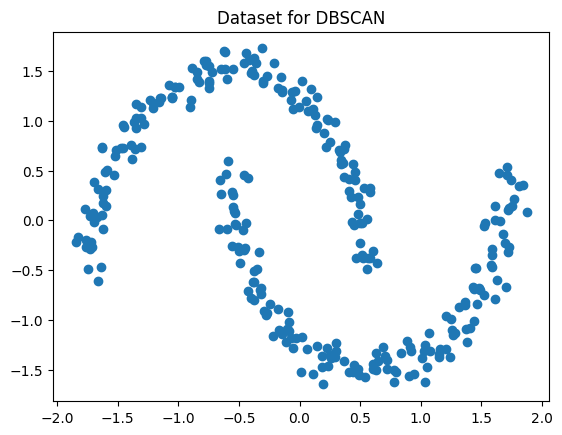

In [3]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Dataset for DBSCAN")
plt.show()

#Applying DBSCAN

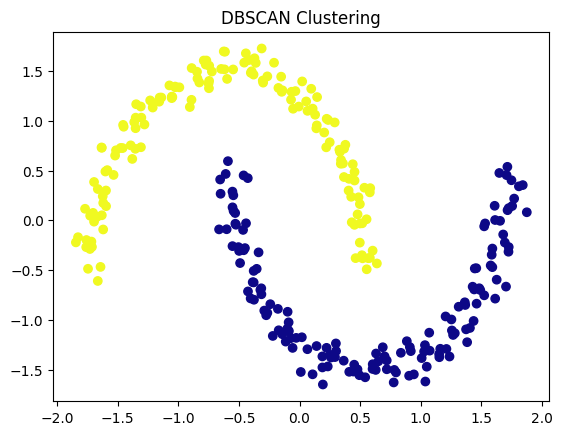

In [4]:

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

#Can you change epsilon and min values to observe how things change? For instance,

* Try eps=0.1, eps=0.5 and observe the difference.
* What happens when you change min_samples to 3 or 10?
* Can you also identify noise for each trial. (Hint: np.sum(labels == -1) after you your clusters)

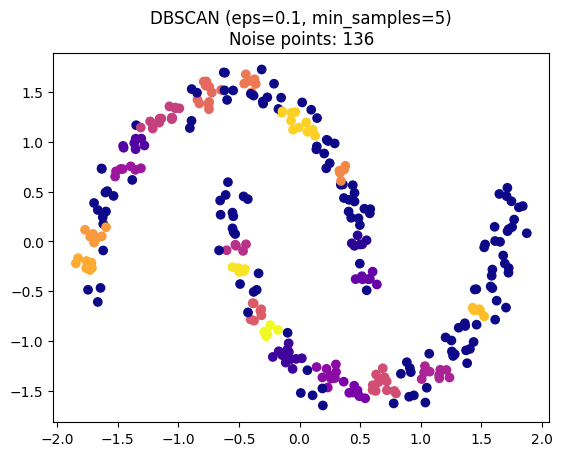

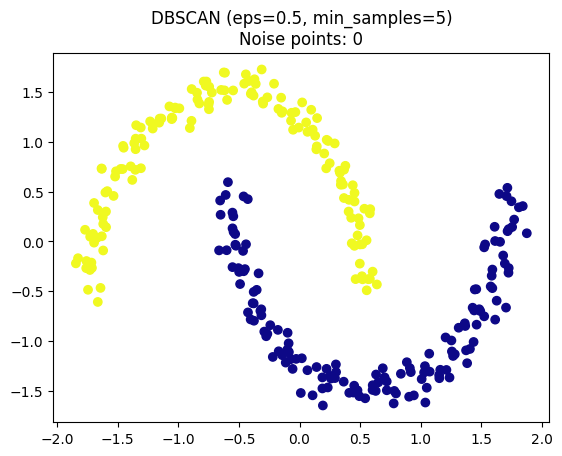

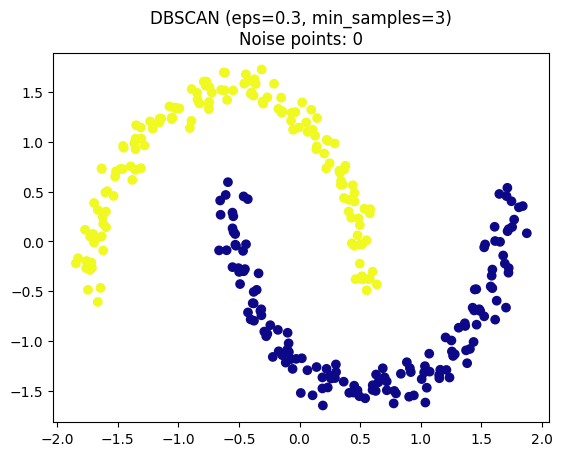

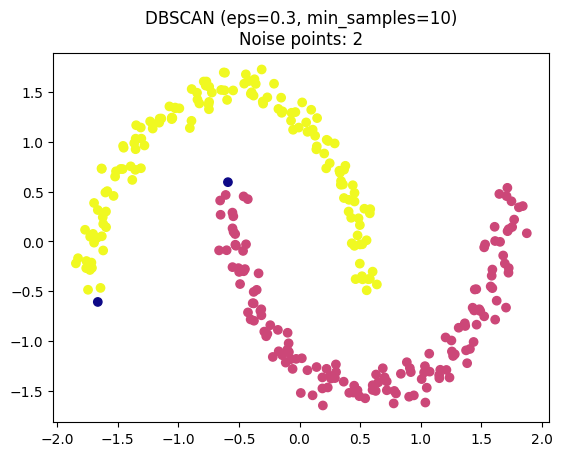

In [5]:
params = [
    (0.1, 5),
    (0.5, 5),
    (0.3, 3),
    (0.3, 10)
]

for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    noise = np.sum(labels == -1)

    plt.figure()
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})\nNoise points: {noise}")
    plt.show()


In [6]:
# Print the number of noise points for each configuration
for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    noise = np.sum(labels == -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print(f"eps={eps}, min_samples={min_samples} --> Clusters: {n_clusters}, Noise points: {noise}")


eps=0.1, min_samples=5 --> Clusters: 21, Noise points: 136
eps=0.5, min_samples=5 --> Clusters: 2, Noise points: 0
eps=0.3, min_samples=3 --> Clusters: 2, Noise points: 0
eps=0.3, min_samples=10 --> Clusters: 2, Noise points: 2


#Use a real dataset:
* Try load_iris() from sklearn.datasets.
* Apply DBSCAN

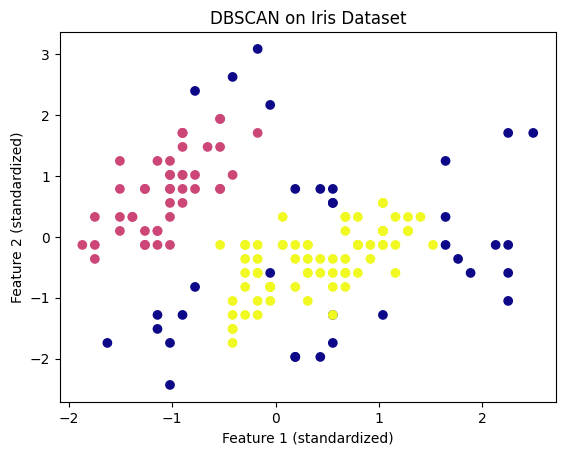

DBSCAN on Iris: Clusters=2, Noise Points=34


In [7]:
from sklearn.datasets import load_iris

# Load and scale Iris data
iris = load_iris()
X_iris = iris.data
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Apply DBSCAN
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
labels_iris = dbscan_iris.fit_predict(X_iris_scaled)

# Plot the results
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=labels_iris, cmap='plasma')
plt.title("DBSCAN on Iris Dataset")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()

# Noise points
noise_iris = np.sum(labels_iris == -1)
n_clusters_iris = len(set(labels_iris)) - (1 if -1 in labels_iris else 0)
print(f"DBSCAN on Iris: Clusters={n_clusters_iris}, Noise Points={noise_iris}")
